# Monte Carlo Integration
---

GOAL: Calculate the integral 

\begin{equation}
  I = \int_{a}^{b}f(x)dx
\end{equation}

using Monte Carlo methods.

IDEA: Choose randomly selected nodes $x_{i}$ on the interval $[a,b]$ and approximate the integral by

\begin{equation}
  I \approx \frac{(b-a)}{N}\sum_{i=1}^{N}f(x_{i})
\end{equation}

## 1. Warm-up: estimating $\pi$

In [1]:
## import packages
import numpy as np

In [2]:
## set radius of square
R = 1
a = -R
b = R
areaSquare = (2*R)**2

In [3]:
## experiment 1
in1 = []
out1 = []

N1 = 100

for i in range(int(N1)):
    ## generate point
    x = (b - a)*np.random.random() + a
    y = (b - a)*np.random.random() + a
    r = np.sqrt(x*x + y*y)
    point = [x,y]
    
    ## test
    if r < R:
        in1.append(point)
    else:
        out1.append(point)

N_in1 = len(in1)
area1 = areaSquare*(N_in1/N1)
pi1 = area1/(R*R)

In [7]:
## experiment 2
in2 = []
out2 = []

N2 = 400

for i in range(int(N2)):
    ## generate point
    x = (b - a)*np.random.random() + a
    y = (b - a)*np.random.random() + a
    r = np.sqrt(x*x + y*y)
    point = [x,y]
    
    ## test
    if r < R:
        in2.append(point)
    else:
        out2.append(point)

N_in2 = len(in2)
area2 = areaSquare*(N_in2/N2)
pi2 = area2/(R*R)

In [8]:
## experiment 3
in3 = []
out3 = []

N3 = 1600

for i in range(int(N3)):
    ## generate point
    x = (b - a)*np.random.random() + a
    y = (b - a)*np.random.random() + a
    r = np.sqrt(x*x + y*y)
    point = [x,y]
    
    ## test
    if r < R:
        in3.append(point)
    else:
        out3.append(point)

N_in3 = len(in3)
area3 = areaSquare*(N_in3/N3)
pi3 = area3/(R*R)

<IPython.core.display.Javascript object>


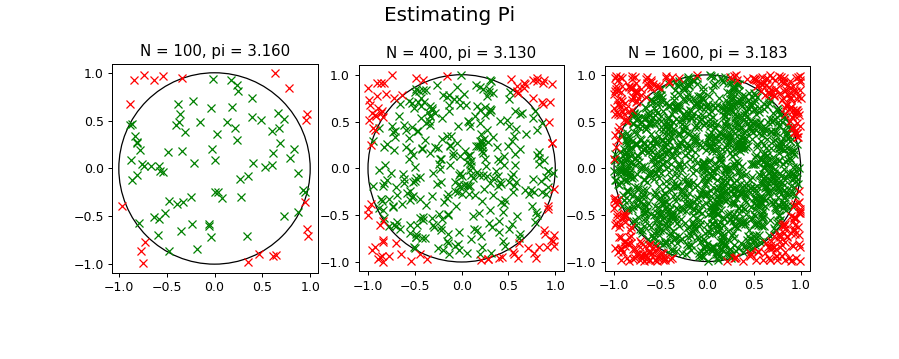

In [9]:
## initialize graphics
%matplotlib notebook
import matplotlib.pyplot as plt

## create fig/axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
fig.suptitle('Estimating Pi', fontsize=16)
fig.subplots_adjust(top=0.95)

## define styles
style1 = {'color':'g', 'linewidth':0, 'marker':'x', 'mfc':None, 'mew':1}
style2 = {'color':'r', 'linewidth':0, 'marker':'x', 'mfc':None, 'mew':1}
style3 = {'color':'k', 'linewidth':1, 'Fill':False}

## define plot objects
in1 = np.array(in1)
in2 = np.array(in2)
in3 = np.array(in3)
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
circle1 = plt.Circle((0, 0), 1.0, **style3)
circle2 = plt.Circle((0, 0), 1.0, **style3)
circle3 = plt.Circle((0, 0), 1.0, **style3)

## experiment 1
ax1.plot(in1[:, 0], in1[:, 1], **style1)
ax1.plot(out1[:, 0], out1[:, 1], **style2)
ax1.add_artist(circle1)
ax1.set_aspect(1.0)
ax1.set_title('N = %d, pi = %.3f' % (N1, area1), fontsize=12)

## experiment 2
ax2.plot(in2[:, 0], in2[:, 1], **style1)
ax2.plot(out2[:, 0], out2[:, 1], **style2)
ax2.add_artist(circle2)
ax2.set_aspect(1.0)
ax2.set_title('N = %d, pi = %.3f' % (N2, area2), fontsize=12)

## experiment 3
ax3.plot(in3[:, 0], in3[:, 1], **style1)
ax3.plot(out3[:, 0], out3[:, 1], **style2)
ax3.add_artist(circle3)
ax3.set_aspect(1.0)
ax3.set_title('N = %d, pi = %.3f' % (N3, area3), fontsize=12)

## output
plt.show()

## 2. Simple example

Consider the integral $I = \int_{-1}^{1}\sqrt{1 - x^2}dx = \pi/2$.

In [10]:
## example 1
def fxn1(x):
    return np.sqrt(1 - x*x)

a1 = -1
b1 = 1
exact1 = np.pi/2

In [14]:
## Monte Carlo integrator
def mcint(a, b, fxn, N):
    
    ## initialization
    ssum = 0
    
    ## use initial seed for repeatable results
    #np.random.seed(30) 
    
    for i in range(int(N)):
        ## generate nodes
        x = (b-a)*np.random.random() + a
        
        ## summand
        ssum = ssum + fxn(x)
    
        ## estimate integral
        integral = (b-a)/N*ssum
    
    ## output
    return integral

In [15]:
a = -1
b = 1
print('Monte Carlo (N = 1e1):', mcint(a, b, fxn1, 1e1))
print('Monte Carlo (N = 1e2):', mcint(a, b, fxn1, 1e2))
print('Monte Carlo (N = 1e4):', mcint(a, b, fxn1, 1e4))
print('Exact                :', np.pi/2)

Monte Carlo (N = 1e1): 1.5514677752734154
Monte Carlo (N = 1e2): 1.5665062177637195
Monte Carlo (N = 1e4): 1.5670273782240536
Exact                : 1.5707963267948966


In [16]:
a = -1
b = 1
N = int(1e3)
trials = []
print('N =', N)
print('---------------------------------')
for i in range(10):
    ans = mcint(a, b, fxn1, N)
    print('Trial', i, '     :', ans)
    trials.append(ans)

trials = np.array(trials)
print('Avg +/- Std  :', np.mean(trials), '+/-', np.std(trials))
print('Exact        :', np.pi/2)

N = 1000
---------------------------------
Trial 0      : 1.5644427778508163
Trial 1      : 1.5935822000645243
Trial 2      : 1.579397493065037
Trial 3      : 1.5722391838624314
Trial 4      : 1.5657463234700388
Trial 5      : 1.5699429230690192
Trial 6      : 1.5554218986605757
Trial 7      : 1.5602876818682188
Trial 8      : 1.557684744247866
Trial 9      : 1.5981099806972683
Avg +/- Std  : 1.5716855206855795 +/- 0.013851727767159452
Exact        : 1.5707963267948966


In [17]:
NTrials = 10000

In [18]:
trial1 = []
N1 = 100
for i in range(NTrials):
    trial1.append(mcint(a, b, fxn1, N1))

trial1 = np.array(trial1)
avg1 = np.mean(trial1)
std1 = np.std(trial1)
print('Avg +/- Std : ', avg1, '+/-', std1)

Avg +/- Std :  1.5711658329564573 +/- 0.044560026143842045


In [19]:
trial2 = []
N2 = 400
for i in range(NTrials):
    trial2.append(mcint(a, b, fxn1, N2))

trial2 = np.array(trial2)
avg2 = np.mean(trial2)
std2 = np.std(trial2)
print('Avg +/- Std : ', avg2, '+/-', std2)

Avg +/- Std :  1.570638538674257 +/- 0.022510251842455586


In [20]:
trial3 = []
N3 = 1600
for i in range(NTrials):
    trial3.append(mcint(a, b, fxn1, N3))
    
trial3 = np.array(trial3)
avg3 = np.mean(trial3)
std3 = np.std(trial3)
print('Avg +/- Std : ', avg3, '+/-', std3)

Avg +/- Std :  1.5706139620524209 +/- 0.011062745442262418


<IPython.core.display.Javascript object>


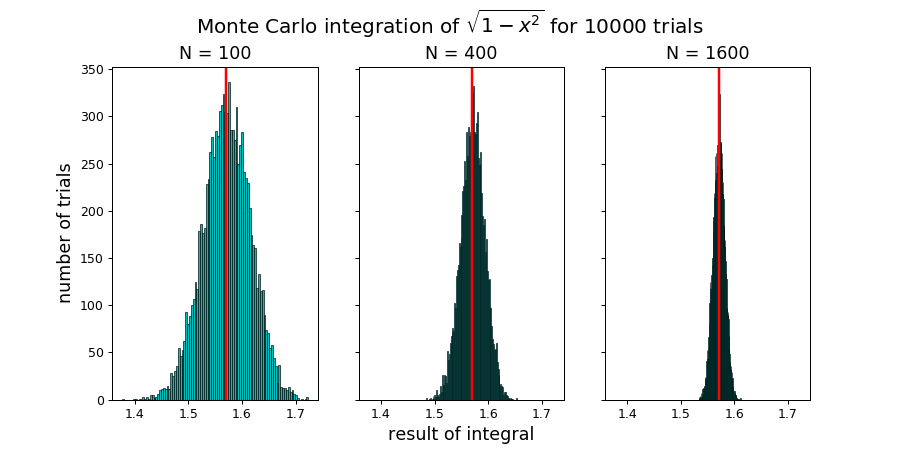

In [21]:
## initialize graphics
%matplotlib notebook
import matplotlib.pyplot as plt

## create fig/axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10,5))
fig.suptitle(r'Monte Carlo integration of $\sqrt{1 - x^2}$ for %d trials' % NTrials, fontsize=16)
fig.subplots_adjust(top=0.85)

## trial 1
ax1.hist(trial1, bins=100, rwidth=1.0, color='c', edgecolor='k', linewidth=0.5, label='_nolegend_')
ax1.axvline(x=np.pi/2, color='r', linewidth=2, label='exact')
ax1.set_title('N = %d' % N1, fontsize=14)
#ax1.set_xlabel('result of integral', fontsize=14)
ax1.set_ylabel('number of trials', fontsize=14)
#ax1.legend(loc='best')

## trial 2
ax2.hist(trial2, bins=100, rwidth=1.0, color='c', edgecolor='k', linewidth=0.5, label='_nolegend_')
ax2.axvline(x=np.pi/2, color='r', linewidth=2, label='exact')
ax2.set_title('N = %d' % N2, fontsize=14)
ax2.set_xlabel('result of integral', fontsize=14)
#ax2.set_ylabel('number of trials', fontsize=14)
#ax2.legend(loc='best')

## trial 3
ax3.hist(trial3, bins=100, rwidth=1.0, color='c', edgecolor='k', linewidth=0.5, label='_nolegend_')
ax3.axvline(x=np.pi/2, color='r', linewidth=2, label='exact')
ax3.set_title('N = %d' % N3, fontsize=14)
#ax3.set_xlabel('result of integral', fontsize=14)
#ax3.set_ylabel('number of trials', fontsize=14)
#ax3.legend(loc='best')

## output
plt.show()